In [716]:
import pandas as pd 
import matplotlib.pyplot as plt

In [717]:
file1 = 'water_data1.csv'
file2 = 'water_data2.csv'

data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

merged_data = pd.concat([data1, data2], ignore_index=True)

merged_data.to_csv('merged_file.csv', index=False)
merged_data

,apartment_number,month,current_reading,previous_reading
0,101,1,150,140
1,102,1,180,170
2,103,1,120,110
3,104,1,210,200
4,101,2,160,150
5,102,2,190,180
6,103,2,130,120
7,104,2,220,210
8,105,2,140,130
9,101,3,170,160


In [718]:
if (merged_data['current_reading'] >= merged_data['previous_reading']).all():
    print("Усі поточні показники лічильника не менші за попередні")
else:
    print("Помилка: деякі поточні показники лічильника менші за попередні")

Усі поточні показники лічильника не менші за попередні


In [719]:
merged_data['consumed_water'] = merged_data['current_reading'] - merged_data['previous_reading']

def show_data_for_month(month):
    month_data = merged_data[merged_data['month'] == month]
    display(month_data[['month','apartment_number', 'consumed_water']])

show_data_for_month(3)

,month,apartment_number,consumed_water
9,3,101,10
10,3,102,10
11,3,103,5


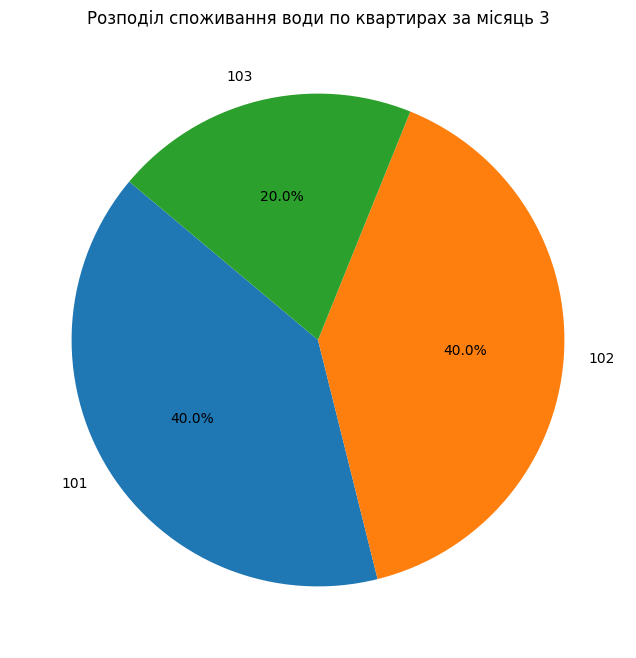

In [720]:
month = 3
month_data = merged_data[merged_data['month'] == month]

if not month_data.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(
        month_data['consumed_water'],
        labels=month_data['apartment_number'],
        autopct='%1.1f%%',
        startangle=140,
    )
    plt.title(f'Розподіл споживання води по квартирах за місяць {month}')
    plt.show()
else:
    print(f"Немає даних для місяця {month}")

Загальна кількість спожитої води в будинку за весь час: 330 м³


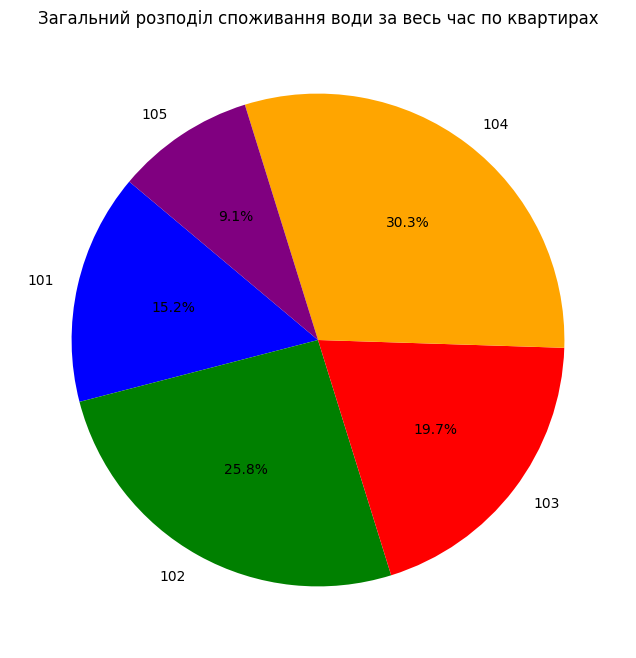

In [ ]:
total_consumption = merged_data.groupby('apartment_number')['consumed_water'].sum().reset_index()
print(f"Загальна кількість спожитої води в будинку за весь час: {total_consumption['consumed_water'].sum()} м³")

colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink', 'gray']
plt.figure(figsize=(8, 8))
plt.pie(total_consumption['consumed_water'], 
        labels=total_consumption['apartment_number'], 
        autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Загальний розподіл споживання води за весь час по квартирах')
plt.show()

In [722]:
water_price = 10.0

merged_data['quarter'] = (merged_data['month'] - 1) // 3 + 1
merged_data['water_cost'] = merged_data['consumed_water'] * water_price
quarter_cost = merged_data.groupby('quarter')['water_cost'].sum().reset_index()

print("Таблиця вартості води за кожний квартал:")
quarter_cost

Таблиця вартості води за кожний квартал:


,quarter,water_cost
0,1,1150.0
1,2,1600.0
2,3,550.0


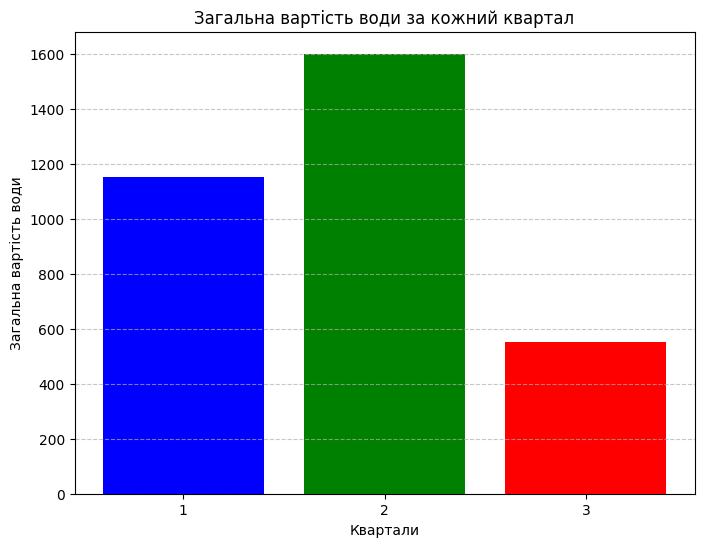

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(quarter_cost['quarter'], quarter_cost['water_cost'], color=colors)
plt.xlabel('Квартали')
plt.ylabel('Загальна вартість води')
plt.title('Загальна вартість води за кожний квартал')
plt.xticks(quarter_cost['quarter'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [724]:
idx = merged_data.groupby('apartment_number')['consumed_water'].idxmax()

max_usage_data = merged_data.loc[idx, ['apartment_number', 'month', 'consumed_water']]
max_usage_data

print("Найбільше місячне споживання і номери місяців, у яких споживання було найбільше:")
max_usage_data


Найбільше місячне споживання і номери місяців, у яких споживання було найбільше:


,apartment_number,month,consumed_water
15,101,5,15
22,102,7,35
12,103,4,20
13,104,4,40
8,105,2,10


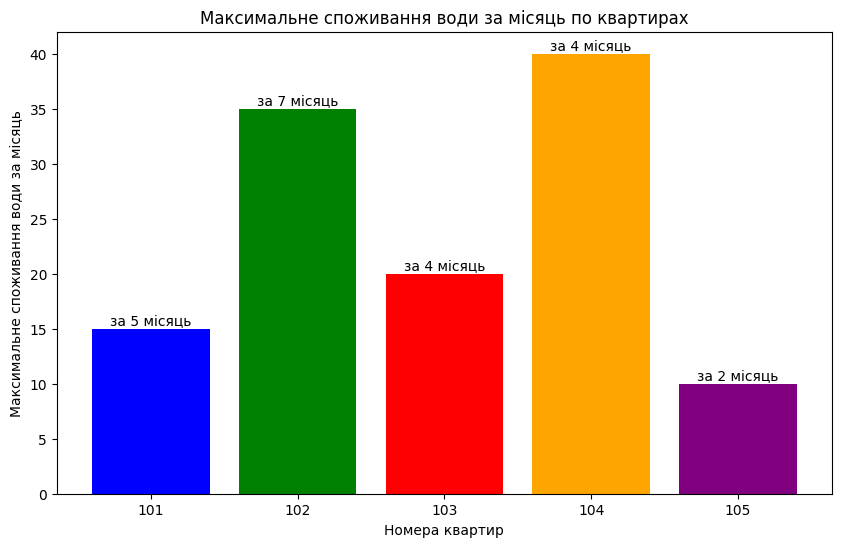

In [725]:
plt.figure(figsize=(10, 6))
bars = plt.bar(max_usage_data['apartment_number'], max_usage_data['consumed_water'], color=colors)
plt.xlabel('Номера квартир')
plt.ylabel('Максимальне споживання води за місяць')
plt.title('Максимальне споживання води за місяць по квартирах')

for bar, month in zip(bars, max_usage_data['month']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'за {month} місяць', 
             ha='center', va='bottom', fontsize=10)

plt.show()